In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'hugo'
df = pd.read_csv(f'data_{station}/{station}_raw.csv')
cols = [col for col in df.columns]

In [42]:

# Pasamos la columna 'date' a formato datetime

try:
    df['date'] = pd.to_datetime(df['date'])
except ValueError:  # Capturamos la excepción correcta
    for i in range(len(df)):
        fecha = df.loc[i, 'date']  

        if len(fecha) == 10:  # Verificamos si la fecha no tiene hora
            fecha += ' 00:00:00'  # Añadimos '00:00:00'
        
            # Convertimos la cadena a formato datetime
            df.loc[i, 'date'] = pd.to_datetime(fecha)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56976 entries, 0 to 56975
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            56976 non-null  int64  
 1   julianday       56976 non-null  int64  
 2   month           56976 non-null  int64  
 3   day             56976 non-null  int64  
 4   temp            56976 non-null  float64
 5   pres            56976 non-null  float64
 6   vel             56976 non-null  float64
 7   dir             56976 non-null  int64  
 8   hr              56976 non-null  float64
 9   deltat          56976 non-null  int64  
 10  time_formatted  56976 non-null  int64  
 11  date            56976 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 5.2+ MB


In [43]:

# En caso de que los nulos tengan un formato diferente

df.replace(444, np.nan, inplace=True)

In [44]:
cols

['year',
 'julianday',
 'month',
 'day',
 'temp',
 'pres',
 'vel',
 'dir',
 'hr',
 'deltat',
 'time_formatted',
 'date']

### Uniformamos el dataset

-Eliminamos las columnas que no nos interesen

-Fijamos la columan de fecha

In [46]:
# date,temp,skt,dir,vel,hr,prec,pres

columns_to_drop = [
    'year',
 'julianday',
 'month',
 'day','deltat',
 'time_formatted',
    ]

df_2 = df.drop(columns=columns_to_drop)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56976 entries, 0 to 56975
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    52782 non-null  float64
 1   pres    37309 non-null  float64
 2   vel     26779 non-null  float64
 3   dir     26779 non-null  float64
 4   hr      29825 non-null  float64
 5   date    56976 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.6+ MB


In [29]:
df_2['date'] = df_2['date'].apply(lambda x: x if ':' in str(x) else str(x) + ' 00:00:00')
df_2['date'].head()

df_2['date'] = pd.to_datetime(df_2['date'])

In [47]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56976 entries, 0 to 56975
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    52782 non-null  float64
 1   pres    37309 non-null  float64
 2   vel     26779 non-null  float64
 3   dir     26779 non-null  float64
 4   hr      29825 non-null  float64
 5   date    56976 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.6+ MB


In [48]:
#Recuento de nulos

df_2.isnull().sum()

temp     4194
pres    19667
vel     30197
dir     30197
hr      27151
date        0
dtype: int64

In [49]:
# Recuento de fechas duplicadas
duplicates = df_2.duplicated(subset='date', keep='first').sum()

duplicates

0

### Reindexación de las columnas

In [50]:
cols = [col for col in df_2.columns]
cols

['temp', 'pres', 'vel', 'dir', 'hr', 'date']

In [34]:
# date,temp,skt,dir,vel,hr,prec,pres
new_order = ['date', 'temp', 'dir', 'vel', 'hr',  'pres']
df = df.reindex(columns=new_order)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35256 entries, 0 to 35255
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35256 non-null  object
 1   temp    33615 non-null  object
 2   dir     33615 non-null  object
 3   vel     33610 non-null  object
 4   hr      33414 non-null  object
 5   prec    33615 non-null  object
 6   pres    33597 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


### Visualizacion de los datos

hr ---> <class 'pandas.core.series.Series'>
prec ---> <class 'pandas.core.series.Series'>
pres ---> <class 'pandas.core.series.Series'>
temp ---> <class 'pandas.core.series.Series'>
dir ---> <class 'pandas.core.series.Series'>
vel ---> <class 'pandas.core.series.Series'>


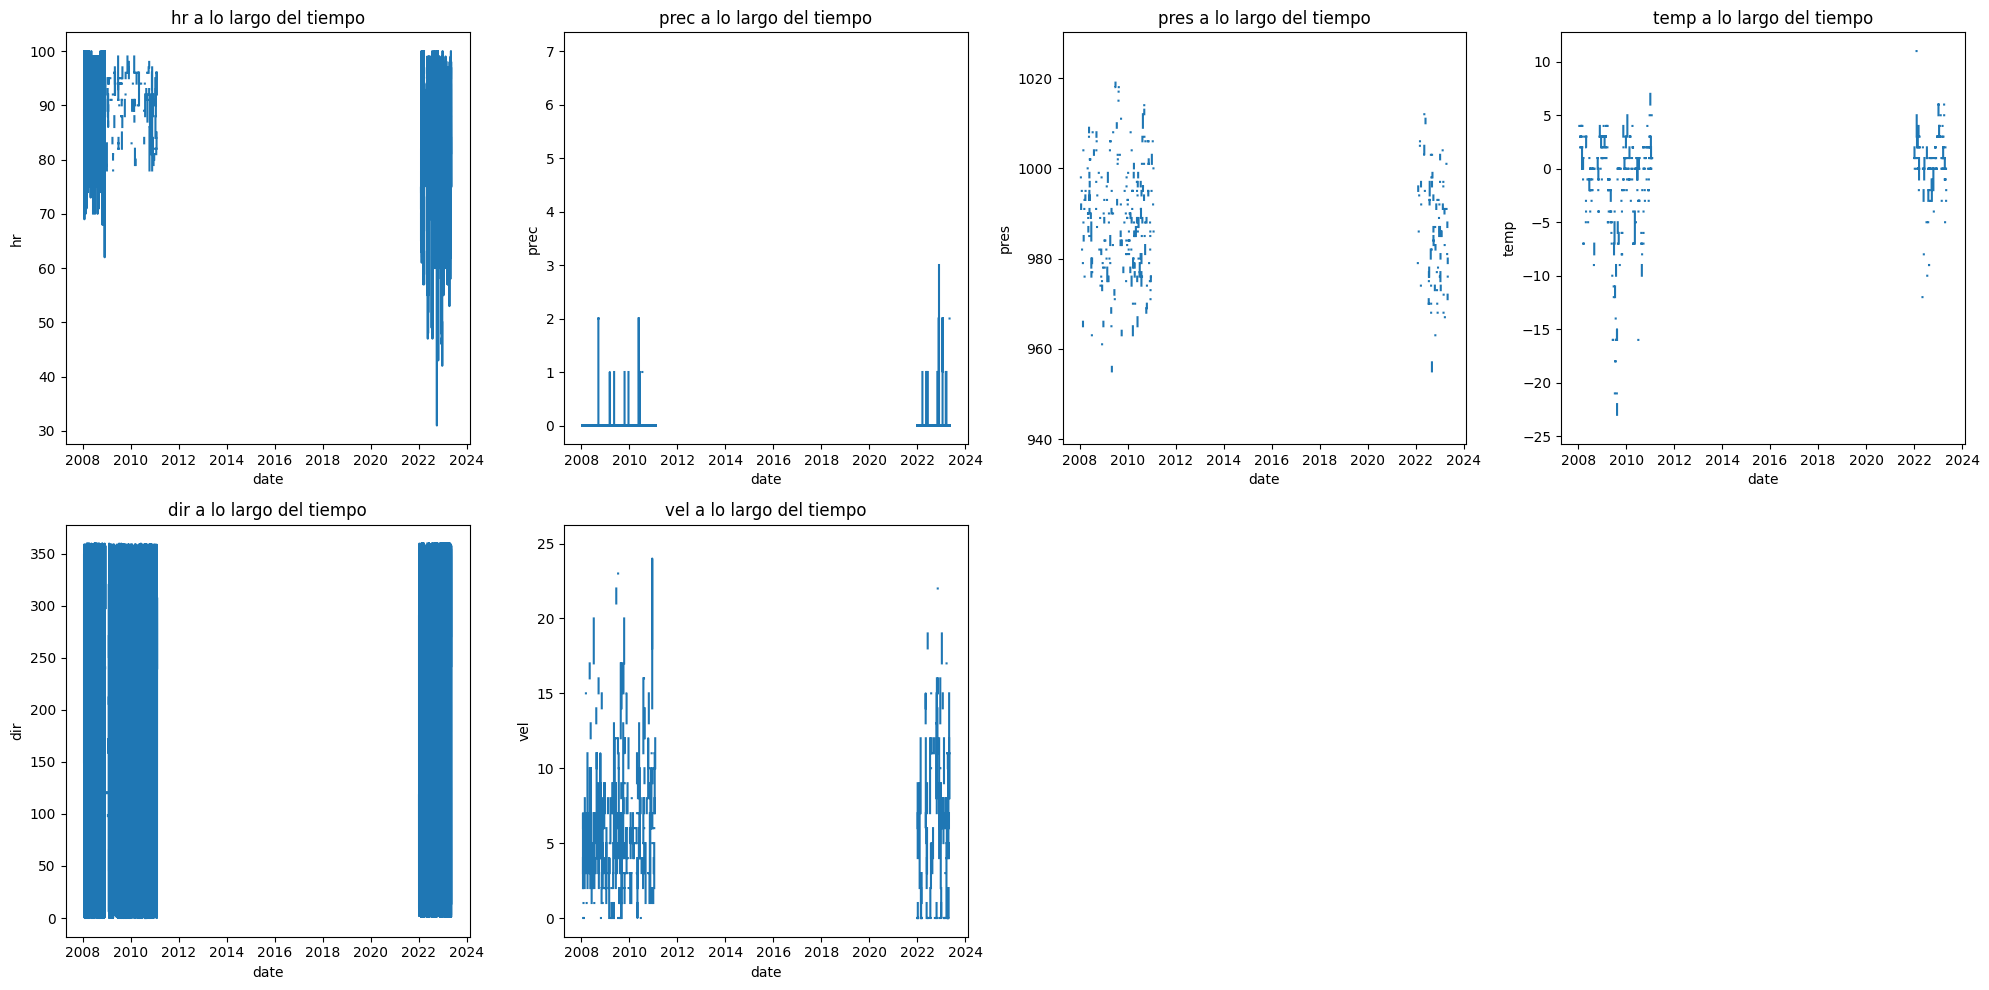

In [36]:


num_cols = len(df_2.columns) - 1  
num_rows = math.ceil(num_cols / 4)  


fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_2.columns.drop(date)):
    print(col, '--->' ,type(df_2[col]))
    df_2[col] = pd.to_numeric(df_2[col], errors='coerce')
    ax.plot(df_2['date'], df_2[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo del tiempo')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [35]:
df_2.to_csv(f'data_{station}/{station}_clean.csv', index=False)